IMPORTATION DES BIBLIOTHEQUES

1- Chargement et Compréhension des données

2-Nettoyage et encodage

3-Division train/test

4-Entraînement de 3 modèles

5-Évaluation et comparaison claire**

## Partie 1 -  Chargement et Compréhension des données

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

CHARGER LES DONNEES 

In [3]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


REDEFINIR LE NOM DES CLONNES

In [4]:
df = df.rename(columns={
    "price": "prix",
    "bedrooms": "chambres",
    "bathrooms": "salles de bain",
    "sqft_living": "surface habitable",
    "sqft_lot": "surface du terrain",
    "floors": "nombre d'étages",
    "waterfront": "en bord de mer (0 = non, 1 = oui)",
    "grade": "qualité de la construction",
    "sqft_above": "surface au-dessus du sol",
    "qft_basement": "surface du sous-sol",
    "yr_built": "année de construction",
    "yr_renovated": "année de rénovation",
    "zipcode": "code postal",
    "lat": "latitude",
    "long": "longitude",

})
df

,id,date,prix,chambres,salles de bain,surface habitable,surface du terrain,nombre d'étages,"en bord de mer (0 = non, 1 = oui)",view,...,qualité de la construction,surface au-dessus du sol,sqft_basement,année de construction,année de rénovation,code postal,latitude,longitude,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## 2- Préparation et nettoyage des donnees

In [5]:
# Supprimer la colonne id
df = df.drop(columns=['id'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   date                               21613 non-null  object 
 1   prix                               21613 non-null  float64
 2   chambres                           21613 non-null  int64  
 3   salles de bain                     21613 non-null  float64
 4   surface habitable                  21613 non-null  int64  
 5   surface du terrain                 21613 non-null  int64  
 6   nombre d'étages                    21613 non-null  float64
 7   en bord de mer (0 = non, 1 = oui)  21613 non-null  int64  
 8   view                               21613 non-null  int64  
 9   condition                          21613 non-null  int64  
 10  qualité de la construction         21613 non-null  int64  
 11  surface au-dessus du sol           21613 non-null  int

In [7]:
# Convertir la date
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S', errors='coerce')
df['annee_vente'] = df['date'].dt.year
df['mois_vente'] = df['date'].dt.month
df = df.drop(columns=['date'])

In [8]:
df.columns

Index(['prix', 'chambres', 'salles de bain', 'surface habitable',
       'surface du terrain', 'nombre d'étages',
       'en bord de mer (0 = non, 1 = oui)', 'view', 'condition',
       'qualité de la construction', 'surface au-dessus du sol',
       'sqft_basement', 'année de construction', 'année de rénovation',
       'code postal', 'latitude', 'longitude', 'sqft_living15', 'sqft_lot15',
       'annee_vente', 'mois_vente'],
      dtype='object')

In [9]:
df.describe()

,prix,chambres,salles de bain,surface habitable,surface du terrain,nombre d'étages,"en bord de mer (0 = non, 1 = oui)",view,condition,qualité de la construction,...,sqft_basement,année de construction,année de rénovation,code postal,latitude,longitude,sqft_living15,sqft_lot15,annee_vente,mois_vente
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000


In [10]:
# on crée ou on ajoute des features utiles  
df['age_maison'] = df['annee_vente'] - df['année de construction']
df['maison_renovee'] = np.where(df['année de rénovation'] > 0, 1, 0)
df = df.drop(columns=['année de construction', 'année de rénovation'])

In [11]:
df

,prix,chambres,salles de bain,surface habitable,surface du terrain,nombre d'étages,"en bord de mer (0 = non, 1 = oui)",view,condition,qualité de la construction,...,sqft_basement,code postal,latitude,longitude,sqft_living15,sqft_lot15,annee_vente,mois_vente,age_maison,maison_renovee
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,98178,47.5112,-122.257,1340,5650,2014,10,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,98125,47.7210,-122.319,1690,7639,2014,12,63,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,98028,47.7379,-122.233,2720,8062,2015,2,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,98136,47.5208,-122.393,1360,5000,2014,12,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,98074,47.6168,-122.045,1800,7503,2015,2,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,98103,47.6993,-122.346,1530,1509,2014,5,5,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,98146,47.5107,-122.362,1830,7200,2015,2,1,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,98144,47.5944,-122.299,1020,2007,2014,6,5,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,98027,47.5345,-122.069,1410,1287,2015,1,11,0


On Calcule la moyenne et la médiane de la surface du terrain de la maison (*prix*)

In [12]:
df['prix'].mean()

np.float64(540088.1417665294)

In [13]:
df['prix'].median()

np.float64(450000.0)

In [14]:
# Les valeurs sont très différentes et en analysant davantage, on peut voir que ce n'est pas parce qu'il y a des valeurs manquantes qui viendrait biaiser nos données car il n'y en a pas.
# En regardant avec describe, on peut voir que nos quatre quartiles sont à 0 tandis que notre maximum est à 552. On peut conclure que cette différence viendrait du fait que la grosse
# majorité des maisons n'ont tout simplement pas de porche, mais il y en a quelques-unes avec un porche immense.

In [15]:
df['prix'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: prix, dtype: float64

In [16]:
colonnes = df.columns
colonnes

Index(['prix', 'chambres', 'salles de bain', 'surface habitable',
       'surface du terrain', 'nombre d'étages',
       'en bord de mer (0 = non, 1 = oui)', 'view', 'condition',
       'qualité de la construction', 'surface au-dessus du sol',
       'sqft_basement', 'code postal', 'latitude', 'longitude',
       'sqft_living15', 'sqft_lot15', 'annee_vente', 'mois_vente',
       'age_maison', 'maison_renovee'],
      dtype='object')

In [17]:
#On a 21 colonnes uniques et differentes dans notre jeu de donnees
colonnes.nunique() 

21

In [18]:
df.dtypes

prix                                 float64
chambres                               int64
salles de bain                       float64
surface habitable                      int64
surface du terrain                     int64
nombre d'étages                      float64
en bord de mer (0 = non, 1 = oui)      int64
view                                   int64
condition                              int64
qualité de la construction             int64
surface au-dessus du sol               int64
sqft_basement                          int64
code postal                            int64
latitude                             float64
longitude                            float64
sqft_living15                          int64
sqft_lot15                             int64
annee_vente                            int32
mois_vente                             int32
age_maison                             int64
maison_renovee                         int64
dtype: object

On tracer un graphique montrant la distribution des prix des maisons dans le jeu de données. Selon la graphique, on verra dans quelle gamme de prix se trouve la majorité des maisons?

In [19]:
df.nunique() 

# Toutes les colonnes ont un nombre suffisant de valeurs uniques pour etre conservees dans le jeu de donnees. 

prix                                 4028
chambres                               13
salles de bain                         30
surface habitable                    1038
surface du terrain                   9782
nombre d'étages                         6
en bord de mer (0 = non, 1 = oui)       2
view                                    5
condition                               5
qualité de la construction             12
surface au-dessus du sol              946
sqft_basement                         306
code postal                            70
latitude                             5034
longitude                             752
sqft_living15                         777
sqft_lot15                           8689
annee_vente                             2
mois_vente                             12
age_maison                            117
maison_renovee                          2
dtype: int64

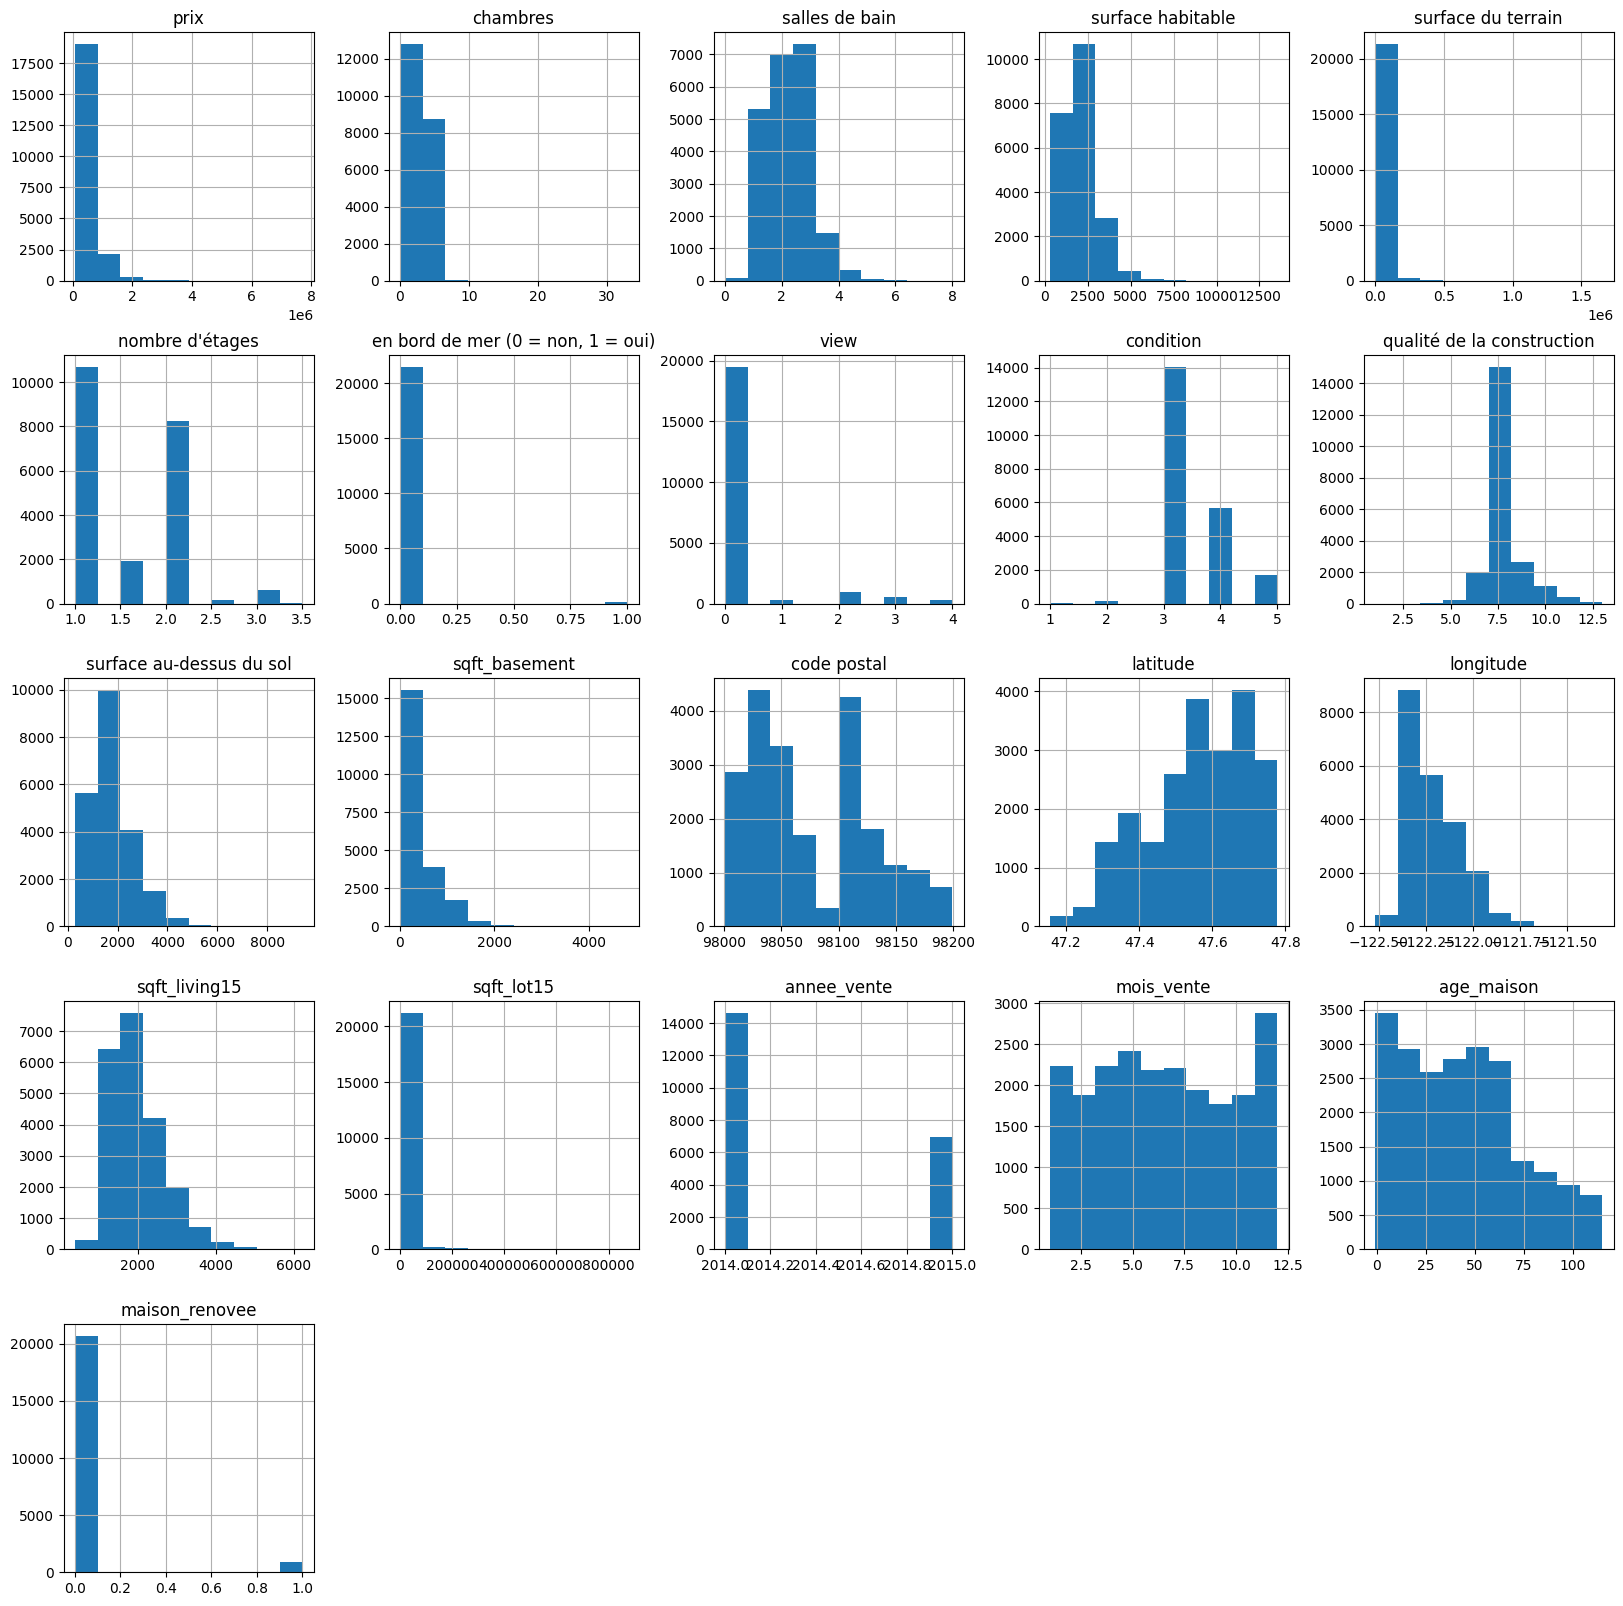

In [20]:
df.hist(figsize=(20,20))
plt.show()

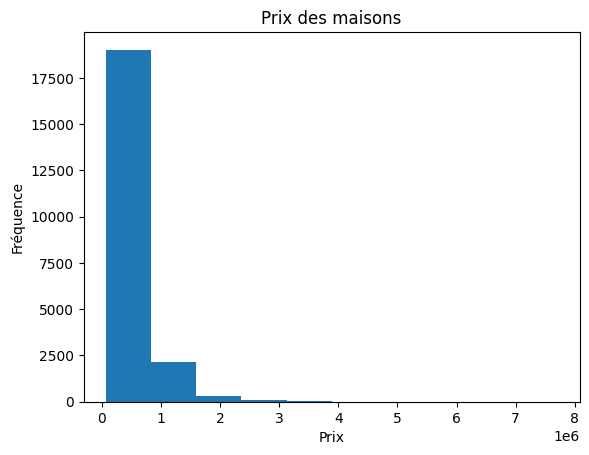

In [21]:
# histogramme est probablement le plus approprié
import matplotlib.pyplot as plt

plt.hist(df['prix'])
plt.title('Prix des maisons')
plt.xlabel('Prix')
plt.ylabel('Fréquence')

plt.show()

# Avec ce grahique, la majorité des maisons se trouve dans la gamme de prix entre 100 000$ et 1 000 000$

Ici on cherche les valeurs aberantes s'il y en a

<Axes: >

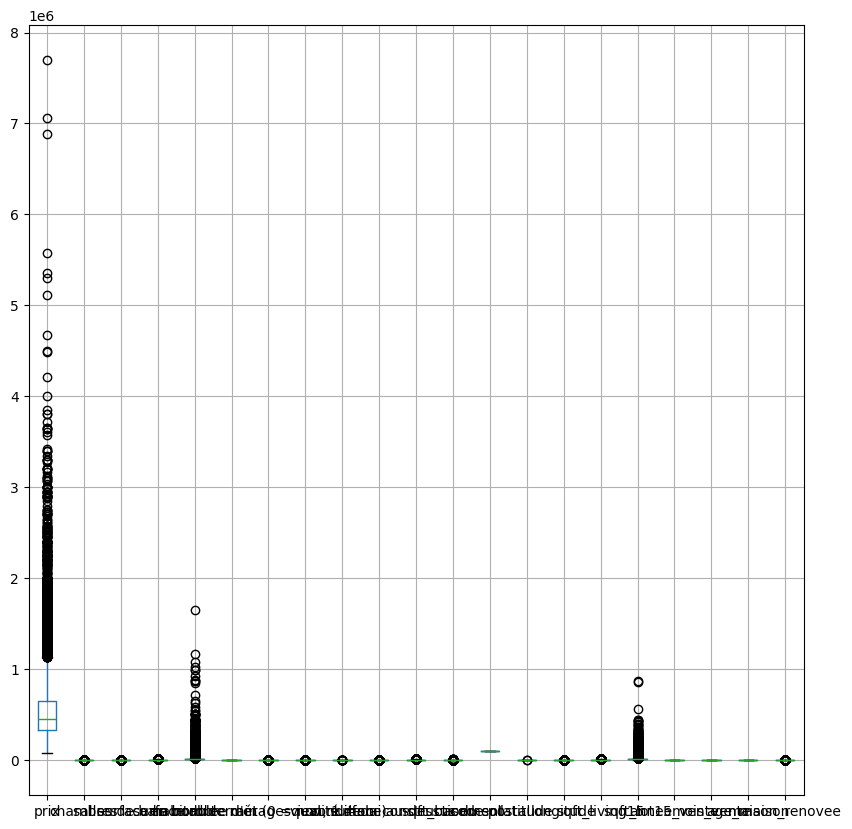

In [23]:
df.boxplot( figsize=(10,10))

<Axes: >

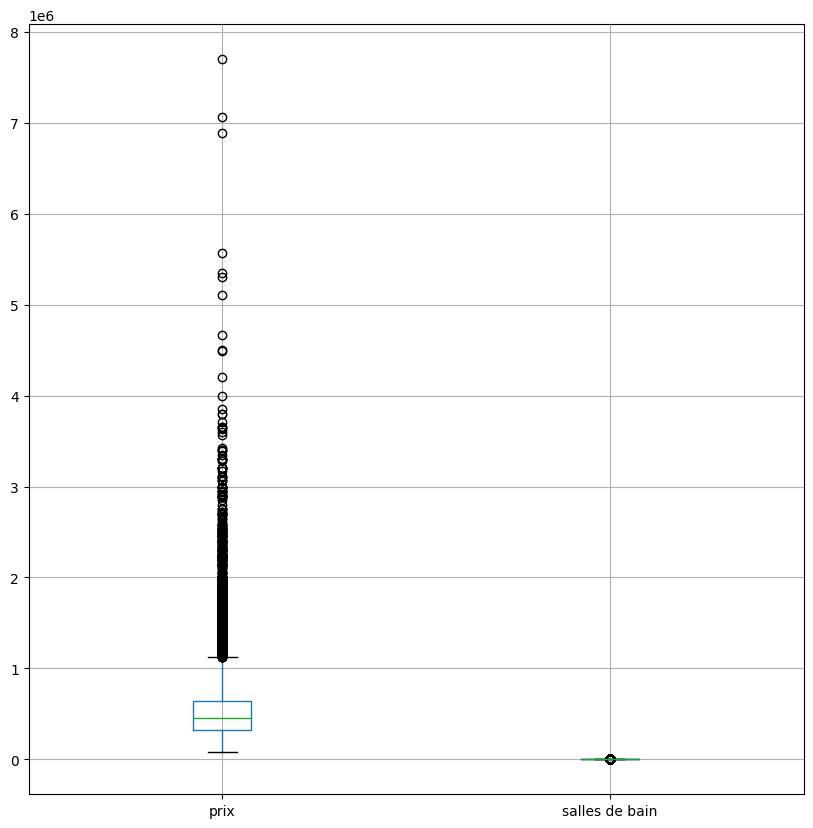

In [24]:
df.boxplot(['prix', 'salles de bain'], figsize=(10,10))

In [ ]:
# # Supprimer les valeurs supérieures a 7000000
# data_sans_outliers = df[df['valeurs'] <= 7000000]


321950.0 645000.0 323050.0


In [ ]:
# # Supprimer les valeurs aberrantes extrêmes sur le prix
# data = data[(data['prix'] < data['prix'].quantile(0.99)) &
#             (data['prix'] > data['prix'].quantile(0.01))]

## 3 - Préparation pour le modèle

In [25]:
# Variables explicatives et cible
X = df.drop(columns=['prix'])
y = df['prix']


# Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Standardisation des variables numériques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
X_train_scaled.shape

(17290, 20)

In [27]:
X_test_scaled.shape

(4323, 20)

## 4- Entraînement de 3 modèles

In [28]:
# a) Régression linéaire
lr = LinearRegression()
lr.fit(X_train_scaled, y_train) 
y_pred_lr = lr.predict(X_test_scaled)

In [29]:
# b) Forêt aléatoire
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [30]:
# c) Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=200, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb


In [ ]:
# XGBoost
#
# xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
# xgb_model.fit(X_train, y_train)
# y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# LightGBM
# #
# lgb_model = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=-1, random_state=42)
# lgb_model.fit(X_train, y_train)
# y_pred_lgb = lgb_model.predict(X_test)

## 5- Évaluation des models 

In [32]:
def eval_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name}")
    print(f"MAE: {mae:,.0f}")
    print(f"RMSE: {rmse:,.0f}")
    print(f"R²: {r2:.3f}\n")
    return {'Model': name, 'MAE': mae, 'RMSE': rmse, 'R2': r2}

results = []
results.append(eval_model("Régression Linéaire", y_test, y_pred_lr))
results.append(eval_model("Random Forest", y_test, y_pred_rf))
results.append(eval_model("Gradient Boosting", y_test, y_pred_gb))
#results.append(eval_model("Gradient ", y_test,y_pred_xgb ))
#results.append(eval_model("Gra ", y_test,y_pred_lgb ))

Régression Linéaire
MAE: 126,967
RMSE: 212,041
R²: 0.703

Random Forest
MAE: 72,540
RMSE: 146,733
R²: 0.858

Gradient Boosting
MAE: 75,886
RMSE: 138,426
R²: 0.873



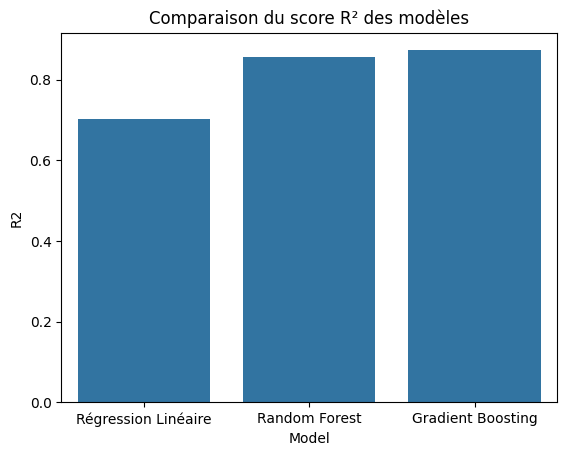

In [33]:
results_df = pd.DataFrame(results)
sns.barplot(data=results_df, x='Model', y='R2')
plt.title("Comparaison du score R² des modèles")
plt.show()

In [ ]:
#6. Interprétation

# Le  R² qui est plus proche de 1 est le   meilleur modèle.

# En général :

# La régression linéaire : simple, baseline, est bonne si les donnes sont lineaire ce qui n'est pas notre cas ici.

# La Random Forest : très performante, robuste.

# Le Gradient Boosting : souvent le meilleur compromis (moins de biais et moins de variance).

# On en conclut :

# Tous les modèles sont bons  car leur (R² > 0.7).

# Le Gradient Boosting est le meilleur globalement :

# erreurs plus faibles (MAE, RMSE),

# et meilleure explication de la variance (R² plus proche de 1).